## Combine Similarity Matrices
Generated in chunks by `simmatrix.py` 

In [78]:
import os

import song
import utils
import numpy as np
import pickle
# 
# # 
# with open('analysis/sim_matrix-0-200.pickle', 'rb') as file:
#     mat0 = pickle.load(file)
# with open('analysis/sim_matrix-200-500.pickle', 'rb') as file:
#     mat1 = pickle.load(file)
# with open('analysis/sim_matrix-500-850.pickle', 'rb') as file:
#     mat2 = pickle.load(file)
# with open('analysis/sim_matrix-850-1200.pickle', 'rb') as file:
#     mat3 = pickle.load(file)
# with open('analysis/sim_matrix-1200-2037.pickle', 'rb') as file:
#     mat4 = pickle.load(file)
# 
# similarity_matrix = np.concatenate((mat0, mat1, mat2, mat3, mat4))
# similarity_matrix = similarity_matrix + similarity_matrix.T - np.diag(np.diag(similarity_matrix))
# 
# with open('analysis/similarity_matrix.pkl', 'wb') as f:
#     pickle.dump(similarity_matrix, f)
# 
# 
# 
songs = sorted(os.listdir(utils.OUTPUT_ROOT + "songPickles/"))

with open('analysis/similarity_matrix.pkl', 'rb') as f:
    similarity_matrix = pickle.load(f)

print(similarity_matrix.shape)
print(songs)

(2037, 2037)
['702-Where My Girls At.pickle', 'ABBA-Andante, Andante.pickle', 'ABBA-Angeleyes.pickle', 'ABBA-Another Town, Another Train.pickle', 'ABBA-Chiquitita.pickle', 'ABBA-Dance (While the Music Still Goes on).pickle', 'ABBA-Dancing Queen.pickle', 'ABBA-Does Your Mother Know.pickle', 'ABBA-Eagle.pickle', 'ABBA-Fernando.pickle', 'ABBA-Gimme! Gimme! Gimme!.pickle', 'ABBA-Hasta Manana.pickle', 'ABBA-Hey, Hey Helen.pickle', 'ABBA-Hole In Your Soul.pickle', 'ABBA-Honey Honey.pickle', 'ABBA-I Am the City.pickle', 'ABBA-I Do, I Do, I Do, I Do.pickle', 'ABBA-I Wonder (Departure).pickle', "ABBA-I'm a Marionette.pickle", 'ABBA-Kisses of Fire.pickle', 'ABBA-Knowing Me, Knowing You.pickle', 'ABBA-Lay All Your Love on Me.pickle', 'ABBA-Like an Angel Passing Through My Room.pickle', 'ABBA-Lovers (Live a Little Longer).pickle', 'ABBA-Mamma Mia.pickle', 'ABBA-Medley.pickle', 'ABBA-Money, Money, Money.pickle', 'ABBA-Move On.pickle', 'ABBA-My Love My Life.pickle', 'ABBA-Name of the Game.pickle', '

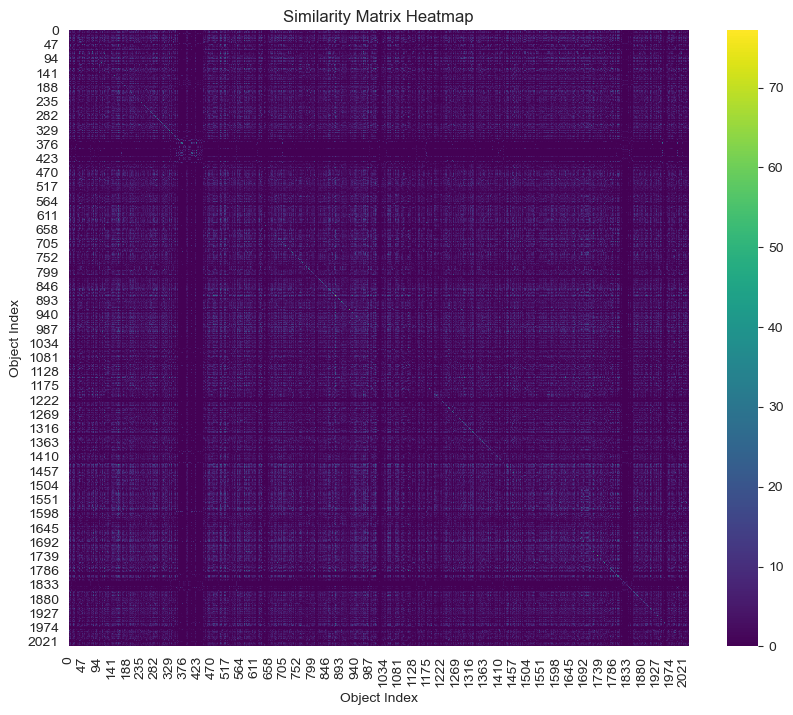

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.xlabel("Object Index")
plt.ylabel("Object Index")
plt.show()


In [81]:
pairs = []
n = similarity_matrix.shape[0]
for i in range(n):
    for j in range(i + 1, n):  # Exclude the diagonal and avoid duplicate pairs
        pairs.append(((i, j), similarity_matrix[i, j]))

# Step 3: Sort the Pairs by Similarity Scores
pairs.sort(key=lambda x: x[1], reverse=True)

# Step 4: Print the Top Pairs
top_pairs = pairs[:50]
print("Top pairs with the highest similarity scores:")
for pair, score in top_pairs:
    print(f"{songs[pair[0]]} / {songs[pair[1]]}, Similarity: {score}")



Top pairs with the highest similarity scores:
Harpo-Movie Star.pickle / Harpo-Moviestar.pickle, Similarity: 42.45215597388503
Gordon Lightfoot-Carefree Highway.pickle / The Corrs-I Never Loved You Anyway.pickle, Similarity: 41.96244397623469
Battisti-Donna selvaggia donna.pickle / The Beatles-Long, Long, Long.pickle, Similarity: 41.87893901261379
Battisti-Anche per te.pickle / Sheena Easton-The Wind Beneath My Wings.pickle, Similarity: 40.771790878398306
Chicago-Beginnings.pickle / Chicago-Where We Begin.pickle, Similarity: 39.63079437828343
Madonna-Like a Prayer.pickle / The Corrs-I Never Loved You Anyway.pickle, Similarity: 38.29082243880251
Gordon Lightfoot-Carefree Highway.pickle / Simon & Garfunkel-Cecilia.pickle, Similarity: 38.04088509907805
AC DC-Highway To Hell.pickle / Deep Blue Something-Breakfast At Tiffany's.pickle, Similarity: 37.41347628755924
Eagles-Lyin' Eyes.pickle / Pet Shop Boys-Always.pickle, Similarity: 37.17212428055823
Martha Reeves-(Love Is Like a) Heat Wave.pi

<AxesSubplot:>

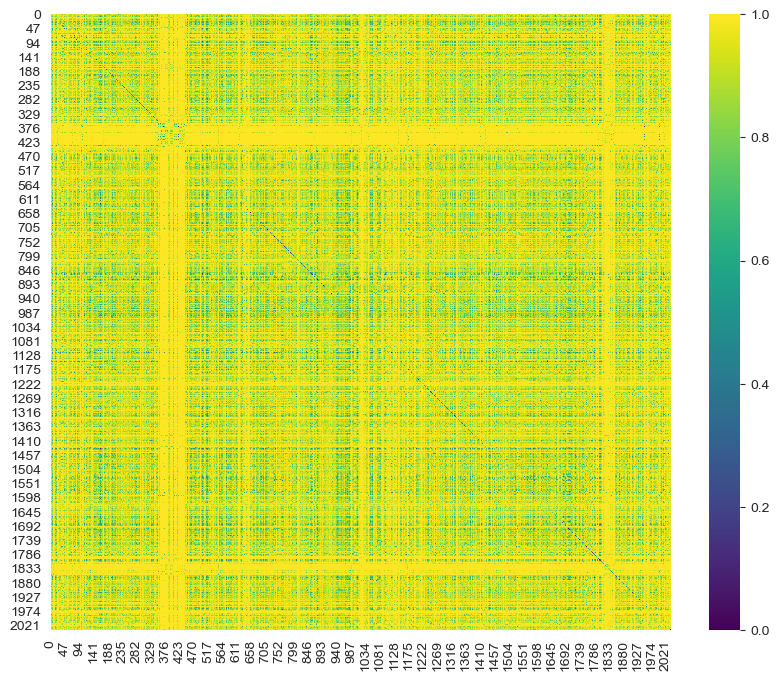

In [82]:
max_sim = 3 ** 2 * 4  # (9 channel pairs, 4 quarter notes)
distance = np.clip(similarity_matrix, 0, max_sim)
distance = (max_sim - distance) / max_sim
plt.figure(figsize=(10, 8))
sns.heatmap(distance, cmap='viridis')

Estimated number of clusters: 4
Estimated number of noise points: 1202


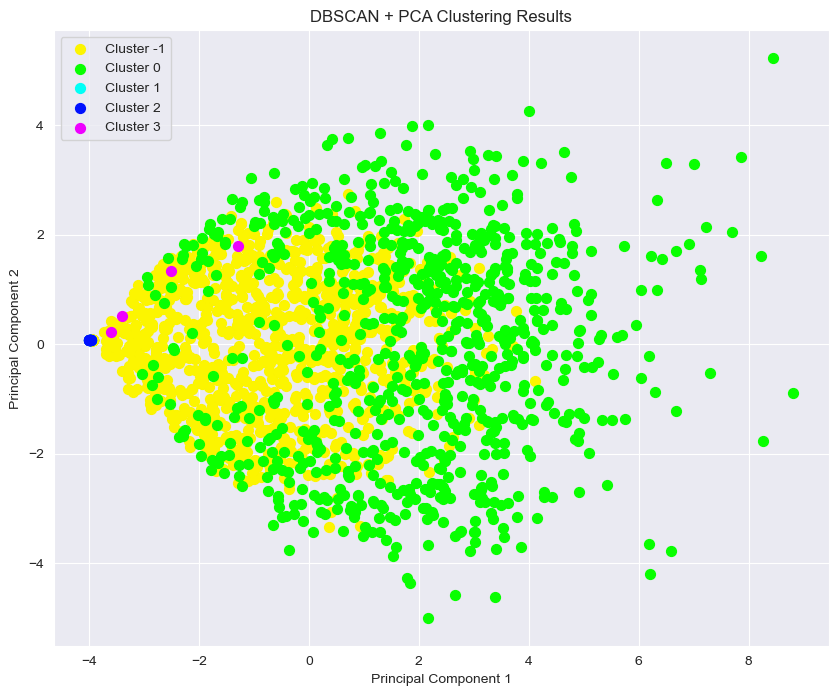

In [83]:
from sklearn.cluster import DBSCAN

# for eps in range(40, 100, 5):
#     for s in range(2,10):
# 
#         db = DBSCAN(eps=eps/100, min_samples=s, metric="precomputed").fit(distance)
#         labels = db.labels_
# 
#         # Number of clusters in labels, ignoring noise if present.
#         n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#         n_noise_ = list(labels).count(-1)
# 
#         print(f"{eps=}, {s=}, N Clust {n_clusters_}, N Noise {n_noise_}")
#         
#  # eps=85, s=2, N Clust 5, N Noise 55
# 

db = DBSCAN(eps=0.5, min_samples=5, metric="precomputed").fit(distance)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(distance)

palette = sns.color_palette("hsv", np.unique(labels).max() + 2)

plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    cluster_points = reduced_data[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=palette[cluster + 1],
                label=f'Cluster {cluster}')

plt.title('DBSCAN + PCA Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

no_cluster = [songs[i] for i in range(len(labels)) if labels[i] == -1]
songs_in_clusters = [[] for _ in range(n_clusters_)]
for i, label in enumerate(labels):
    if label == -1:
        no_cluster.append(songs[i])
    else:
        songs_in_clusters[label].append(songs[i])



In [84]:
from pprint import pprint

for i, cl in enumerate(songs_in_clusters):
    pprint(cl)


['ABBA-Andante, Andante.pickle',
 'ABBA-Angeleyes.pickle',
 'ABBA-Dance (While the Music Still Goes on).pickle',
 'ABBA-Dancing Queen.pickle',
 'ABBA-Does Your Mother Know.pickle',
 'ABBA-Eagle.pickle',
 'ABBA-Fernando.pickle',
 'ABBA-I Do, I Do, I Do, I Do.pickle',
 'ABBA-I Wonder (Departure).pickle',
 "ABBA-I'm a Marionette.pickle",
 'ABBA-Kisses of Fire.pickle',
 'ABBA-Knowing Me, Knowing You.pickle',
 'ABBA-Lay All Your Love on Me.pickle',
 'ABBA-Mamma Mia.pickle',
 'ABBA-Medley.pickle',
 'ABBA-Money, Money, Money.pickle',
 'ABBA-My Love My Life.pickle',
 'ABBA-Rock Me.pickle',
 'ABBA-S.O.S.pickle',
 'ABBA-Summer Night City.pickle',
 'ABBA-Super Trooper.pickle',
 'ABBA-Super Trouper.pickle',
 'ABBA-Thank You for the Music.pickle',
 "ABBA-That's Me.pickle",
 'ABBA-The Visitors.pickle',
 'ABBA-The Winner Takes It All.pickle',
 'ABBA-Tiger.pickle',
 'ABBA-Voulez Vous.pickle',
 'ABBA-Waterloo.pickle',
 'AC DC-Dirty Deeds Done Dirt Cheap.pickle',
 'AC DC-For Those About To Rock (We Salu

## Transform Songs in the Top Pairs

In [51]:
import transform

for pair, score in top_pairs:
    print(f"{songs[pair[0]]} <- {songs[pair[1]]}")
    transform.transform_songs(
        song.AnalyzedSong(songs[pair[0]]),
        song.AnalyzedSong(songs[pair[1]])
    )
    print()
    
    

Harpo-Movie Star.pickle <- Harpo-Moviestar.pickle
S1: String Ensemble 1 S2: String Ensemble 1, Score ((0, 0), 2.031548994992693)
S1: String Ensemble 1 S2: String Ensemble 1, Score ((1, 1), 1.5917843793843656)
S1: Glockenspiel S2: Glockenspiel, Score ((2, 2), 1.2036478569361961)

The Corrs-I Never Loved You Anyway.pickle <- Gordon Lightfoot-Carefree Highway.pickle
S1: Synth Voice S2: Acoustic Guitar (nylon), Score ((2, 1), 1.2627335223557494)
S1: Electric Piano 2 S2: Acoustic Guitar (steel), Score ((1, 0), 1.1987394193760565)
S1: Honky-tonk Piano S2: String Ensemble 1, Score ((0, 2), 1.0739429721571667)

The Beatles-Long, Long, Long.pickle <- Battisti-Donna selvaggia donna.pickle
S1: Lead 3 (calliope) S2: Acoustic Guitar (steel), Score ((2, 2), 1.0053406634279478)
S1: Sitar S2: Flute, Score ((1, 1), 0.9238595145501326)

Battisti-Anche per te.pickle <- Sheena Easton-The Wind Beneath My Wings.pickle
S1: Acoustic Grand Piano S2: Electric Piano 1, Score ((0, 0), 2.4570194980794686)
S1: Acou

In [68]:
def plot_piano_rolls(names, midis, output=None, fs=100, draw=False):
    fig, axs = plt.subplots(len(midis), 1, figsize=(12, len(midis) * 6), sharex=True, sharey=True)

    if len(midis) == 1:
        axs = [axs]  # Make sure axs is iterable if there is only one subplot

    for idx, midi_data in enumerate(midis):
        # Calculate total duration of the MIDI file in seconds
        total_time = midi_data.get_end_time()

        # Determine the length of the piano roll based on the total duration and sampling frequency
        num_time_steps = int(total_time * fs)

        # Initialize a piano roll with zeros
        combined_piano_roll = np.zeros((128, num_time_steps))

        for instrument in midi_data.instruments:
            if not instrument.is_drum:
                piano_roll = instrument.get_piano_roll(fs=fs)

                # Ensure the piano roll has the correct number of time steps
                if piano_roll.shape[1] < num_time_steps:
                    # Pad with zeros if shorter
                    padded_piano_roll = np.zeros((128, num_time_steps))
                    padded_piano_roll[:, :piano_roll.shape[1]] = piano_roll
                else:
                    # Truncate if longer
                    padded_piano_roll = piano_roll[:, :num_time_steps]

                combined_piano_roll += padded_piano_roll

        # Plot the combined piano roll
        im = axs[idx].imshow(combined_piano_roll, aspect='auto', origin='lower', cmap='coolwarm', extent=[0, total_time, 0, 128])
        axs[idx].set_title(names[idx])
        axs[idx].set_xlabel('Time (seconds)')
        axs[idx].set_ylabel('MIDI Pitch')
        axs[idx].set_ylim(20, 108)  # Only display standard piano range
        axs[idx].grid(True, linestyle='--', alpha=0.6)
        
        axs[idx].set_xticks(np.arange(0, total_time + 1, 60))
        axs[idx].set_xticklabels(np.arange(0, total_time + 1, 60))

    if draw:
        plt.show()
    if output is not None:
        plt.savefig(utils.OUTPUT_ROOT + "transformedVis/" + output + ".png")
        
    plt.close('all')



In [69]:
for pair, score in pairs[:100]:
    name = f"{songs[pair[0]][:-7]}<-{songs[pair[1]][:-7]}"
    midis = transform.transform_songs(
        song.AnalyzedSong(songs[pair[0]]),
        song.AnalyzedSong(songs[pair[1]])
    )
    
    plot_piano_rolls([songs[p][:-7] for p in pair], midis, name)


S1: String Ensemble 1 S2: String Ensemble 1, Score ((0, 0), 2.031548994992693)
S1: String Ensemble 1 S2: String Ensemble 1, Score ((1, 1), 1.5917843793843656)
S1: Glockenspiel S2: Glockenspiel, Score ((2, 2), 1.2036478569361961)
S1: Synth Voice S2: Acoustic Guitar (nylon), Score ((2, 1), 1.2627335223557494)
S1: Electric Piano 2 S2: Acoustic Guitar (steel), Score ((1, 0), 1.1987394193760565)
S1: Honky-tonk Piano S2: String Ensemble 1, Score ((0, 2), 1.0739429721571667)
S1: Lead 3 (calliope) S2: Acoustic Guitar (steel), Score ((2, 2), 1.0053406634279478)
S1: Sitar S2: Flute, Score ((1, 1), 0.9238595145501326)
S1: Acoustic Grand Piano S2: Electric Piano 1, Score ((0, 0), 2.4570194980794686)
S1: Acoustic Guitar (steel) S2: String Ensemble 1, Score ((2, 1), 1.34658906497289)
S1: String Ensemble 1 S2: Acoustic Guitar (steel), Score ((1, 2), 0.7504640464281774)
S1: Bright Acoustic Piano S2: Acoustic Guitar (steel), Score ((1, 2), 2.125756385338118)
S1: Acoustic Guitar (steel) S2: Electric Gra

/var/folders/7z/h_fphvb96k5cjwqcbc0ptpjr0000gn/T/ipykernel_77173/1975354524.py:33: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  im = axs[idx].imshow(combined_piano_roll, aspect='auto', origin='lower', cmap='coolwarm', extent=[0, total_time, 0, 128])


S1: Electric Guitar (clean) S2: Acoustic Guitar (steel), Score ((2, 0), 2.176369678639587)
S1: Acoustic Guitar (steel) S2: Electric Guitar (clean), Score ((1, 2), 1.4580668742792686)
S1: String Ensemble 1 S2: Overdriven Guitar, Score ((2, 1), 1.004732019892626)
S1: Acoustic Guitar (nylon) S2: Drawbar Organ, Score ((1, 2), 0.9115409741776649)
S1: Acoustic Guitar (steel) S2: Acoustic Guitar (steel), Score ((0, 0), 0.8953023157155939)
S1: Acoustic Guitar (steel) S2: Bright Acoustic Piano, Score ((1, 0), 1.830513763145289)
S1: Honky-tonk Piano S2: Clavinet, Score ((2, 1), 1.467370992209805)
S1: Acoustic Guitar (steel) S2: Acoustic Grand Piano, Score ((2, 0), 1.4284982122235736)
S1: Bright Acoustic Piano S2: String Ensemble 1, Score ((1, 1), 0.7978502120195087)
S1: Electric Bass (finger) S2: Acoustic Guitar (steel), Score ((0, 2), 0.7329790297618987)
S1: Acoustic Guitar (steel) S2: Drawbar Organ, Score ((0, 1), 1.1051268509117622)
S1: Acoustic Guitar (nylon) S2: Tuba, Score ((1, 2), 0.93394

### Song Analysis Notes

After looking at piano roll visualization for top 100 pairs and listening to transformed songs:
- The Beatles-Everybody's Trying To Be My Baby<-Alan Jackson-Love's Got a Hold on You
    - Very similar ascending baseline at 0:20 for both songs, and similar melodies
    - Probably the best one I’ve found
- Brassens Georges-Je rejoindrai ma belle<-Brassens Georges-Les ricochets
    - Pretty similar throughout!
- The Beatles-Little Queenie<-The Beatles-I Got a Woman
    - I Got A Woman 1:10 and Little Queenie 3:36 pretty similar melody + chords
- Deep Blue Something-Breakfast At Tiffany's<-AC DC-Highway To Hell
    - Similar chords/melody: Highway: 1:00, Breakfast: 0:30
- Battisti-Anche per te<-ABBA-Does Your Mother Know
    - Similar chords at 0:15-0:45 for both songs
- Amanda McBroom-The Rose->The Corrs-I Never Loved You Anyway
    - Similarish melody/chords at The Rose: 0:20, I Never Loved: 0:20, 1:10
- Vangelis-Hymne->Brassens Georges-Je rejoindrai ma belle
    - Similarish at 0:20, 0:30
- Deep Blue Something-Breakfast At Tiffany's->Chicago-Beginnings
    - Decent in the first 1:30
- Gordon Lightfoot-Carefree Highway<-Depeche Mode-Never Let Me Down Again
    - Pretty similar chords 1:45 on both
- Gordon Lightfoot-Carefree Highway<-The Beatles-Dig It
    - Similarish chords at Carefree 0:30 and Dig It throughout


## "Influential" Artists
Can we use the Similarity Matrix to determine who the most "influential" artists are?

In [85]:
import pickle
import numpy as np

with open('analysis/similarity_matrix.pkl', 'rb') as f:
    similarity_matrix = pickle.load(f)

songs = sorted(os.listdir(utils.OUTPUT_ROOT + "songPickles/"))
songs = [s[:-7] for s in songs]

['702-Where My Girls At', 'ABBA-Andante, Andante', 'ABBA-Angeleyes', 'ABBA-Another Town, Another Train', 'ABBA-Chiquitita', 'ABBA-Dance (While the Music Still Goes on)', 'ABBA-Dancing Queen', 'ABBA-Does Your Mother Know', 'ABBA-Eagle', 'ABBA-Fernando', 'ABBA-Gimme! Gimme! Gimme!', 'ABBA-Hasta Manana', 'ABBA-Hey, Hey Helen', 'ABBA-Hole In Your Soul', 'ABBA-Honey Honey', 'ABBA-I Am the City', 'ABBA-I Do, I Do, I Do, I Do', 'ABBA-I Wonder (Departure)', "ABBA-I'm a Marionette", 'ABBA-Kisses of Fire', 'ABBA-Knowing Me, Knowing You', 'ABBA-Lay All Your Love on Me', 'ABBA-Like an Angel Passing Through My Room', 'ABBA-Lovers (Live a Little Longer)', 'ABBA-Mamma Mia', 'ABBA-Medley', 'ABBA-Money, Money, Money', 'ABBA-Move On', 'ABBA-My Love My Life', 'ABBA-Name of the Game', 'ABBA-Nina Pretty Ballerina', 'ABBA-Rock Me', 'ABBA-S.O.S', 'ABBA-Summer Night City', 'ABBA-Super Trooper', 'ABBA-Super Trouper', 'ABBA-Take a Chance on Me', 'ABBA-Thank You for the Music', "ABBA-That's Me", 'ABBA-The Visito

### Average Similarity across all songs for an Artist

In [98]:
sums = np.sum(similarity_matrix, axis=1)
artist_sums = {}
artist_counts = {}

for i, song in enumerate(songs):
    artist = song.split('-')[0]
    if artist not in artist_sums:
        artist_sums[artist] = 0
        artist_counts[artist] = 0
    artist_sums[artist] += sums[i]
    artist_counts[artist] += 1

MIN_SONGS = 8
artist_avgs = [
    (a, artist_sums[a] / artist_counts[a] / len(songs)) for a in artist_sums if artist_counts[a] > MIN_SONGS
]
artist_avgs = sorted(artist_avgs, key=lambda x: x[1], reverse=True)
pprint(artist_avgs)

[('Chicago', 4.263359153734811),
 ('John Elton', 4.136362094569547),
 ('Raf', 3.9767431437114187),
 ('Brooks Garth', 3.815268134750471),
 ('Radiohead', 3.8070025944122348),
 ('Electric Light Orchestra', 3.7013158603073717),
 ('Alice Cooper', 3.5421442732814152),
 ('Eagles', 3.4395641089077453),
 ('Def Leppard', 3.4099096056510785),
 ('Dalla', 3.3971338661813086),
 ('Simon & Garfunkel', 3.3570609282167427),
 ('Boyzone', 3.3261451793617454),
 ('Michael Jackson', 3.2581332719891707),
 ('Jovanotti', 3.210218372020735),
 ('The Beatles', 3.159419625380598),
 ('Bob Seger', 3.1297039308814067),
 ('Cocciante', 3.1001397431252973),
 ('Battisti', 3.0703401004326105),
 ('ABBA', 3.0634262752887986),
 ('Traffic', 3.0486136162499347),
 ('Rene Froger', 2.99068197571387),
 ('Bob Dylan', 2.8940425281042783),
 ('Pet Shop Boys', 2.736135137498123),
 ('Rossi Vasco', 2.7145172148665586),
 ('The Corrs', 2.699747045312091),
 ('Evans Bill', 2.6597740188788057),
 ('Elvis Presley', 2.6529878354440655),
 ('Yes', 

### Average Similarity, excluding their own songs
(Basically the same as previous result)

In [99]:
artist_sums = {}
artist_counts = {}

for i, song in enumerate(songs):
    artist = song.split('-')[0]

    if artist not in artist_sums:
        artist_sums[artist] = 0
        artist_counts[artist] = 0

    artist_counts[artist] += 1
    for j, song2 in enumerate(songs):
        if song2.startswith(artist):
            continue
        artist_sums[artist] += similarity_matrix[i, j]
        
MIN_SONGS = 8
artist_avgs = [
    (a, artist_sums[a] / artist_counts[a] / len(songs)) for a in artist_sums if artist_counts[a] > MIN_SONGS
]
artist_avgs = sorted(artist_avgs, key=lambda x: x[1], reverse=True)
pprint(artist_avgs)

[('Chicago', 4.193514074416913),
 ('John Elton', 3.9864719252009433),
 ('Raf', 3.933052299790398),
 ('Radiohead', 3.761768052876046),
 ('Brooks Garth', 3.7516824639197592),
 ('Electric Light Orchestra', 3.6698215658504516),
 ('Alice Cooper', 3.490826435533621),
 ('Def Leppard', 3.367951724893926),
 ('Eagles', 3.364381328428604),
 ('Dalla', 3.334975913516544),
 ('Simon & Garfunkel', 3.3180757974258204),
 ('Boyzone', 3.2980785858604227),
 ('Michael Jackson', 3.2184511022713425),
 ('Jovanotti', 3.173821684405466),
 ('Bob Seger', 3.1002309390645393),
 ('Cocciante', 3.0636282228169427),
 ('Traffic', 3.026415804509099),
 ('ABBA', 2.9750305940598323),
 ('Rene Froger', 2.952952819112948),
 ('Battisti', 2.9115237668020915),
 ('Bob Dylan', 2.868723214287495),
 ('Pet Shop Boys', 2.7070789733046716),
 ('The Beatles', 2.6522188764229475),
 ('Evans Bill', 2.644644104479387),
 ('Rossi Vasco', 2.6377398335919),
 ('The Corrs', 2.6355007910067125),
 ('Tom Petty and The Heartbreakers', 2.5860039081576787